# N.B.!:

    В работе использовался сервис Yandex Geocoder. Для его работоспособности требуется получение индивидуального ключа API.
    
    Персональный ключ API можно получить на странице: https://developer.tech.yandex.ru/services/

# Шаг 1. Импорт и предобработка данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

rest_data = pd.read_csv('/datasets/rest_data.csv')

rest_data.head(5)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [2]:
for row in rest_data.columns:
    print('Количество пропусков в столбце ', row, '=', rest_data[row].isnull().sum())
    
print()
print(rest_data.info())    

Количество пропусков в столбце  id = 0
Количество пропусков в столбце  object_name = 0
Количество пропусков в столбце  chain = 0
Количество пропусков в столбце  object_type = 0
Количество пропусков в столбце  address = 0
Количество пропусков в столбце  number = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


# Вывод:
    
    Пропуски отсутствуют, типы данных соответствуют данным. Предоставленный датасет можем использовать для дальнейшей работы.

# Шаг 2. Анализ данных.

## 2.1 Исследуйте . Постройте график.

In [3]:
#Строим сводную таблицу по количеству типов заведений с дополнительным разделением на сетевые и несетевые заведения

type_rest = rest_data.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count')

type_rest.columns = ['yes', 'no'] 
type_rest['total'] = type_rest['yes'] + type_rest['no']

type_rest

,yes,no,total
object_type,,,
бар,37,819,856
буфет,11,574,585
закусочная,56,304,360
кафе,1396,4703,6099
кафетерий,52,346,398
магазин (отдел кулинарии),78,195,273
предприятие быстрого обслуживания,791,1132,1923
ресторан,544,1741,2285
столовая,3,2584,2587


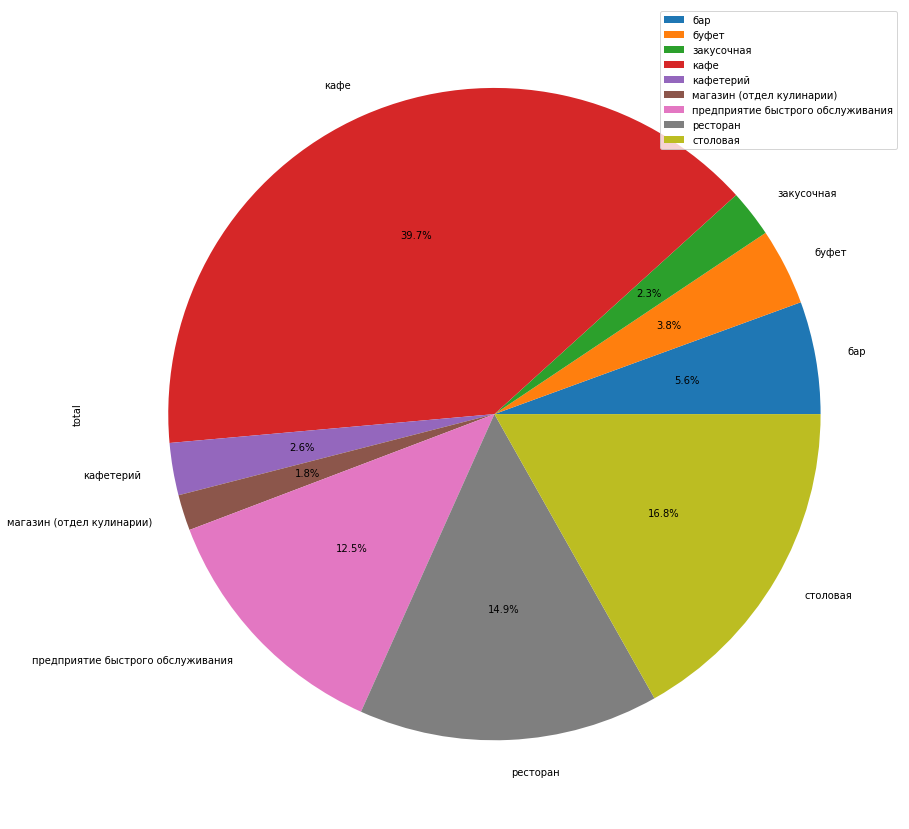

In [4]:
#Строим круговую диаграмму для визуализации результатов

type_rest.plot(kind = 'pie', y = 'total', figsize=(15, 15), autopct='%1.1f%%', )

## Вывод:

    На основании круговой диаграммы делаем вывод, что наиболее распространенными типами заведений в Москва является:
        1. Кафе - 39,7% от общего числа заведений общественного питания.
        2. Столовая - 16.8%.
        3. Ресторан - 14.9%.
        4. Предприятия быстрого обслуживания - 12.5%.
        
        

## 2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

Учитывая, что раннее была построена сводная таблица с дополнительным разделением на сетевые/несетевые заведения, строим столбчатую диаграмму.

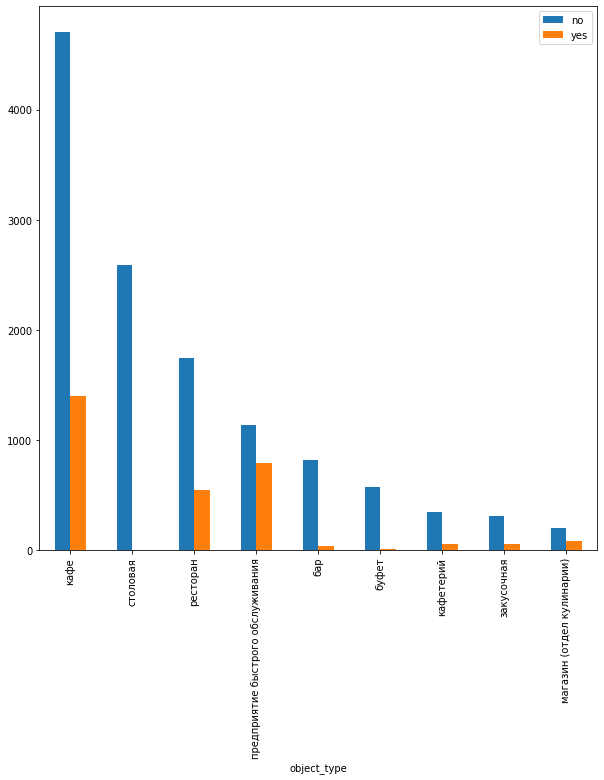

In [5]:
#Строим столбчатую диаграмму

type_rest.sort_values('no', ascending=False).plot(y = ['no', 'yes'], kind="bar", figsize = (10,10), rot = 90)



## Вывод:

    Делаем вывод, что число несетевых заведений значительно больше, чем сетевых. Несетевые заведения лидируют во всех категориях.

    Рассматривая раличные категории предприятий видим следующую закономерность:
        1. Кафе - несетевых в 3 раза больше, чем сетевых.
        2. Столовые - несетевые 2500 заведений, сетевых - незначительно (стремится к 0).
        3. Ресторан - несетевых в 2,5-3 раза больше, чем сетевых.
        4. Предприятия быстрого обслуживания - несетевых в 1,25 раз больше, чем сетевых.
        
    Во всех прочих категориях количество несетевых заведений значительно больше, чем сетевых.

## 2.3 Для какого вида объекта общественного питания характерно сетевое распространение?

In [7]:
type_rest['pers_yes'] = (type_rest['yes'] / type_rest['total']).round(2)

type_rest

,yes,no,total,pers_yes
object_type,,,,
бар,37,819,856,0.04
буфет,11,574,585,0.02
закусочная,56,304,360,0.16
кафе,1396,4703,6099,0.23
кафетерий,52,346,398,0.13
магазин (отдел кулинарии),78,195,273,0.29
предприятие быстрого обслуживания,791,1132,1923,0.41
ресторан,544,1741,2285,0.24
столовая,3,2584,2587,0.00


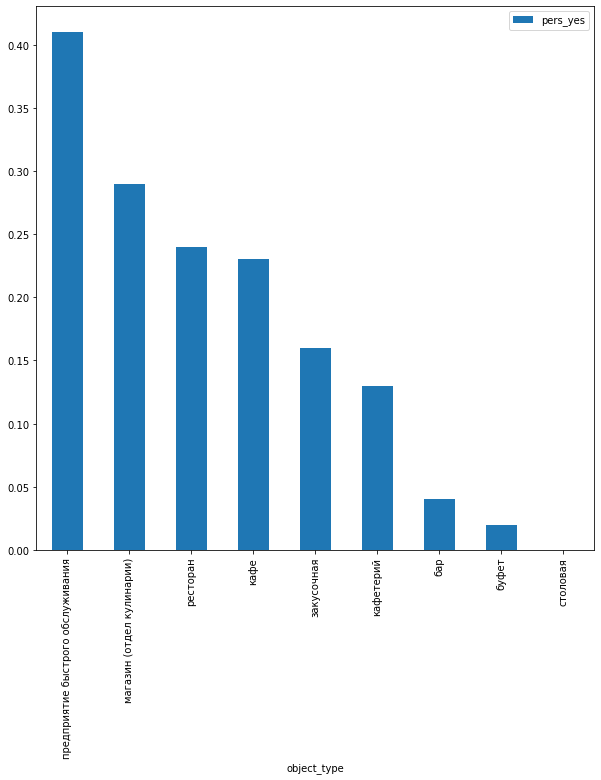

In [8]:
#Строим столбчатую диаграмму

type_rest.sort_values('pers_yes', ascending=False).plot(y = 'pers_yes', kind="bar", figsize = (10,10), rot = 90)

## Вывод:

    Учитывая соотношение сетевых ресторанов к общему числу, можно сделать вывод, что сетевое распространение характерно для:
        1. Предприятий быстрого обслуживания - более 40%
        2. Магазинов и отделов кулинарии - около 30%
        3. Ресторанов и кафе - их доля около 23-25%. Ресторанов на несколько процентов больше.
        4. Закусочные - 15%.       
        

## 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

    Для упрощения рассчетов разделяем число посадочных мест на категории: до 10, до 25 и т.д.
    

In [9]:
chain_rest = rest_data.copy()
chain_rest = chain_rest.query('chain == "да"')

def amount_group(num):
    if num < 10:
        return 'до 10'
    if num < 25:
        return 'от 10 до 25'
    if num < 50:
        return 'от 25 до 50'
    if num < 100:
        return 'от 50 до 100'
    if num < 200:
        return 'от 100 до 200'
    else:
        return 'от 200'
    
    
chain_rest['number_group'] = chain_rest['number'].apply(amount_group)
chain_rest['object_name'] = chain_rest['object_name'].str.lower()

print(chain_rest.shape)

chain_rest.head(5)

(2968, 7)


,id,object_name,chain,object_type,address,number,number_group
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,от 25 до 50
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,от 10 до 25
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32,от 25 до 50
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7,до 10
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160,от 100 до 200




При визуальной оценке названий заведений было замечено, что в некоторых строках одинаковые значениия с разными названиям. Удалим спец. символы, "мусорные слова" (кафе, бар и т.п.), а также заменим названи, написанные на разных языках.

Данная операция выполняется для наиболее распространенных сетевых заведений, общее число которых значительно.

In [10]:

#Обрабатываем похожие имена
chain_rest['object_name'] = chain_rest.object_name.str.replace('«','')
chain_rest['object_name'] = chain_rest.object_name.str.replace('»','')
chain_rest['object_name'] = chain_rest.object_name.str.replace('кафе','')
chain_rest['object_name'] = chain_rest.object_name.str.replace('бар','')
chain_rest['object_name'] = chain_rest.object_name.str.replace('ресторан','')
chain_rest['object_name'] = chain_rest.object_name.str.replace('пиццерия','')
chain_rest['object_name'] = chain_rest.object_name.str.replace('старбакс','starbucks')
chain_rest['object_name'] = chain_rest.object_name.str.replace('суши вок','суши wok')
chain_rest['object_name'] = chain_rest.object_name.str.replace('сабвей','subway')

#Удаляем пробел перед началом строки. Данная ошибка могла появиться из-за ошибки оператора
chain_rest['object_name'] = chain_rest['object_name'].map(lambda x: x.lstrip(' '))


hain_pivot = chain_rest.pivot_table(index = ['object_type', 'object_name'], columns = 'number_group', values = 'id', aggfunc = 'count', margins=True)


#Получаем перечень сетей, где количество заведений более 25. Считаю, что меньшие сети не имеют существенного значения для текущего анализа
#Условие All < 200 используется для отсечения первой строки,  которая считает общую сумму.
hain_pivot = hain_pivot.query('All > 25 and All < 200').fillna(0)#.sort_values(by = 'All', ascending = False)

#Устанавливаем необходимую последовательность столбцов по возрастанию посадочных мест
hain_pivot = hain_pivot[['до 10', 'от 10 до 25', 'от 25 до 50', 'от 50 до 100','от 100 до 200','от 200','All']]

hain_pivot


number_group                                       до 10  от 10 до 25  \
object_type                       object_name                           
кафе                              kfc                3.0          7.0   
                                  starbucks          1.0          7.0   
                                  додо пицца         5.0          9.0   
                                  домино'с пицца     7.0         41.0   
                                  кофе хаус          0.0          5.0   
                                  му-му              0.0          0.0   
                                  папа джонс         3.0         13.0   
                                  прайм стар         1.0          5.0   
                                  суши wok          26.0         17.0   
                                  теремок            4.0         14.0   
                                  хинкальная         0.0          4.0   
                                  хлеб насущный      0.0          5.0   
                                  шоколадница        1.0          8.0   
магазин (отдел кулинарии)         милти             26.0          1.0   
предприятие быстрого обслуживания kfc                7.0         14.0   
                                  subway             9.0         16.0   
                                  бургер кинг        8.0         12.0   
                                  домино'с пицца     4.0         22.0   
                                  крошка картошка   16.0         22.0   
                                  макдоналдс         4.0         10.0   
                                  милти             27.0          0.0   
                                  суши wok          21.0          6.0   
                                  теремок           11.0         17.0   
ресторан                          kfc                4.0          4.0   
                                  макдоналдс         5.0          0.0   
                                  тануки             0.0          0.0   
                                  чайхона №1         0.0          0.0   
                                  якитория           0.0          0.0   

number_group                                       от 25 до 50  от 50 до 100  \
object_type                       object_name                                  
кафе                              kfc                      8.0           9.0   
                                  starbucks               21.0          18.0   
                                  додо пицца              16.0           9.0   
                                  домино'с пицца           7.0           1.0   
                                  кофе хаус                7.0          20.0   
                                  му-му                    0.0           6.0   
                                  папа джонс              14.0           4.0   
                                  прайм стар              14.0           5.0   
                                  суши wok                 0.0           0.0   
                                  теремок                  8.0           3.0   
                                  хинкальная              18.0          12.0   
                                  хлеб насущный           18.0           8.0   
                                  шоколадница             67.0          83.0   
магазин (отдел кулинарии)         милти                    0.0           0.0   
предприятие быстрого обслуживания kfc                     30.0          47.0   
                                  subway                   8.0           0.0   
                                  бургер кинг             37.0          35.0   
                                  домино'с пицца           4.0           0.0   
                                  крошка картошка         15.0           6.0   
                                  макдоналдс              17.0          45.0   
                                  милти          

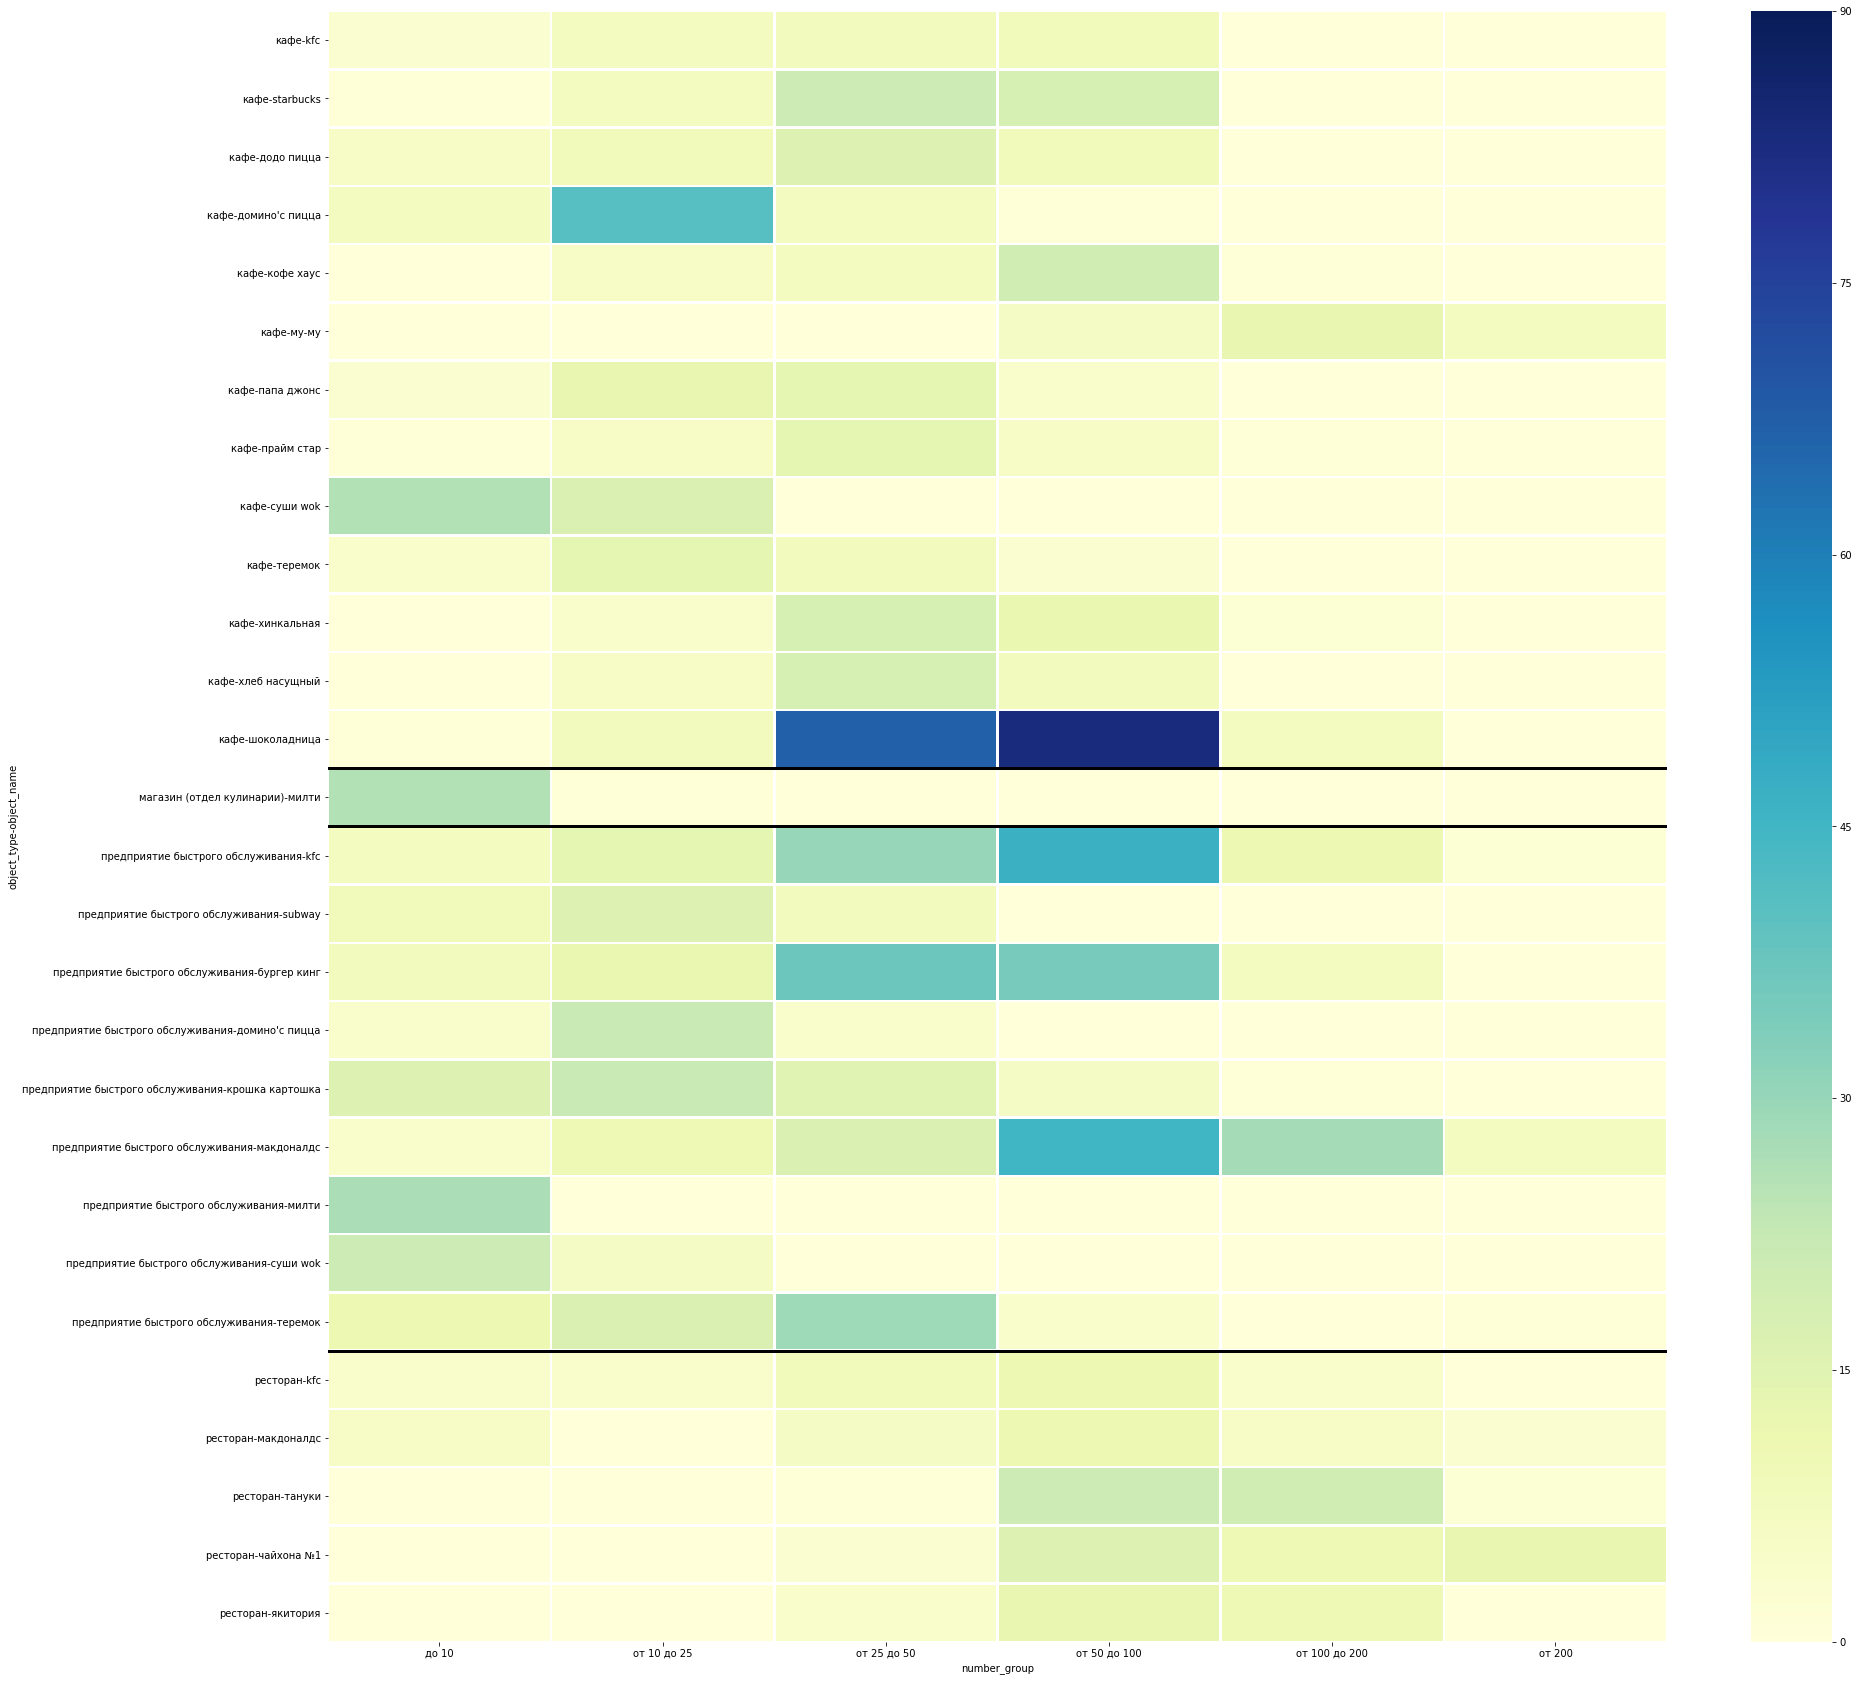

In [11]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,30))    
sns.heatmap(hain_pivot.drop(columns=['All']), vmin=0, vmax=90, linewidths=1.5, cmap="YlGnBu")
ax.axhline(13, 0, 2, linewidth=3, c='black')
ax.axhline(14, 0, 2, linewidth=3, c='black')
ax.axhline(23, 0, 2, linewidth=3, c='black')

In [12]:
chain_pivot = chain_rest.pivot_table(index = 'number_group', columns = 'object_type', values = 'id', aggfunc = 'count')

chain_pivot.fillna(0)

object_type,бар,буфет,закусочная,кафе,кафетерий,магазин (отдел кулинарии),предприятие быстрого обслуживания,ресторан,столовая
number_group,,,,,,,,,
до 10,6.0,8.0,29.0,150.0,28.0,51.0,208.0,23.0,0.0
от 10 до 25,3.0,1.0,14.0,330.0,16.0,18.0,173.0,29.0,0.0
от 100 до 200,6.0,0.0,0.0,100.0,0.0,0.0,54.0,147.0,2.0
от 200,0.0,0.0,0.0,19.0,0.0,0.0,12.0,53.0,0.0
от 25 до 50,14.0,0.0,11.0,419.0,6.0,9.0,183.0,81.0,0.0
от 50 до 100,8.0,2.0,2.0,378.0,2.0,0.0,161.0,211.0,1.0


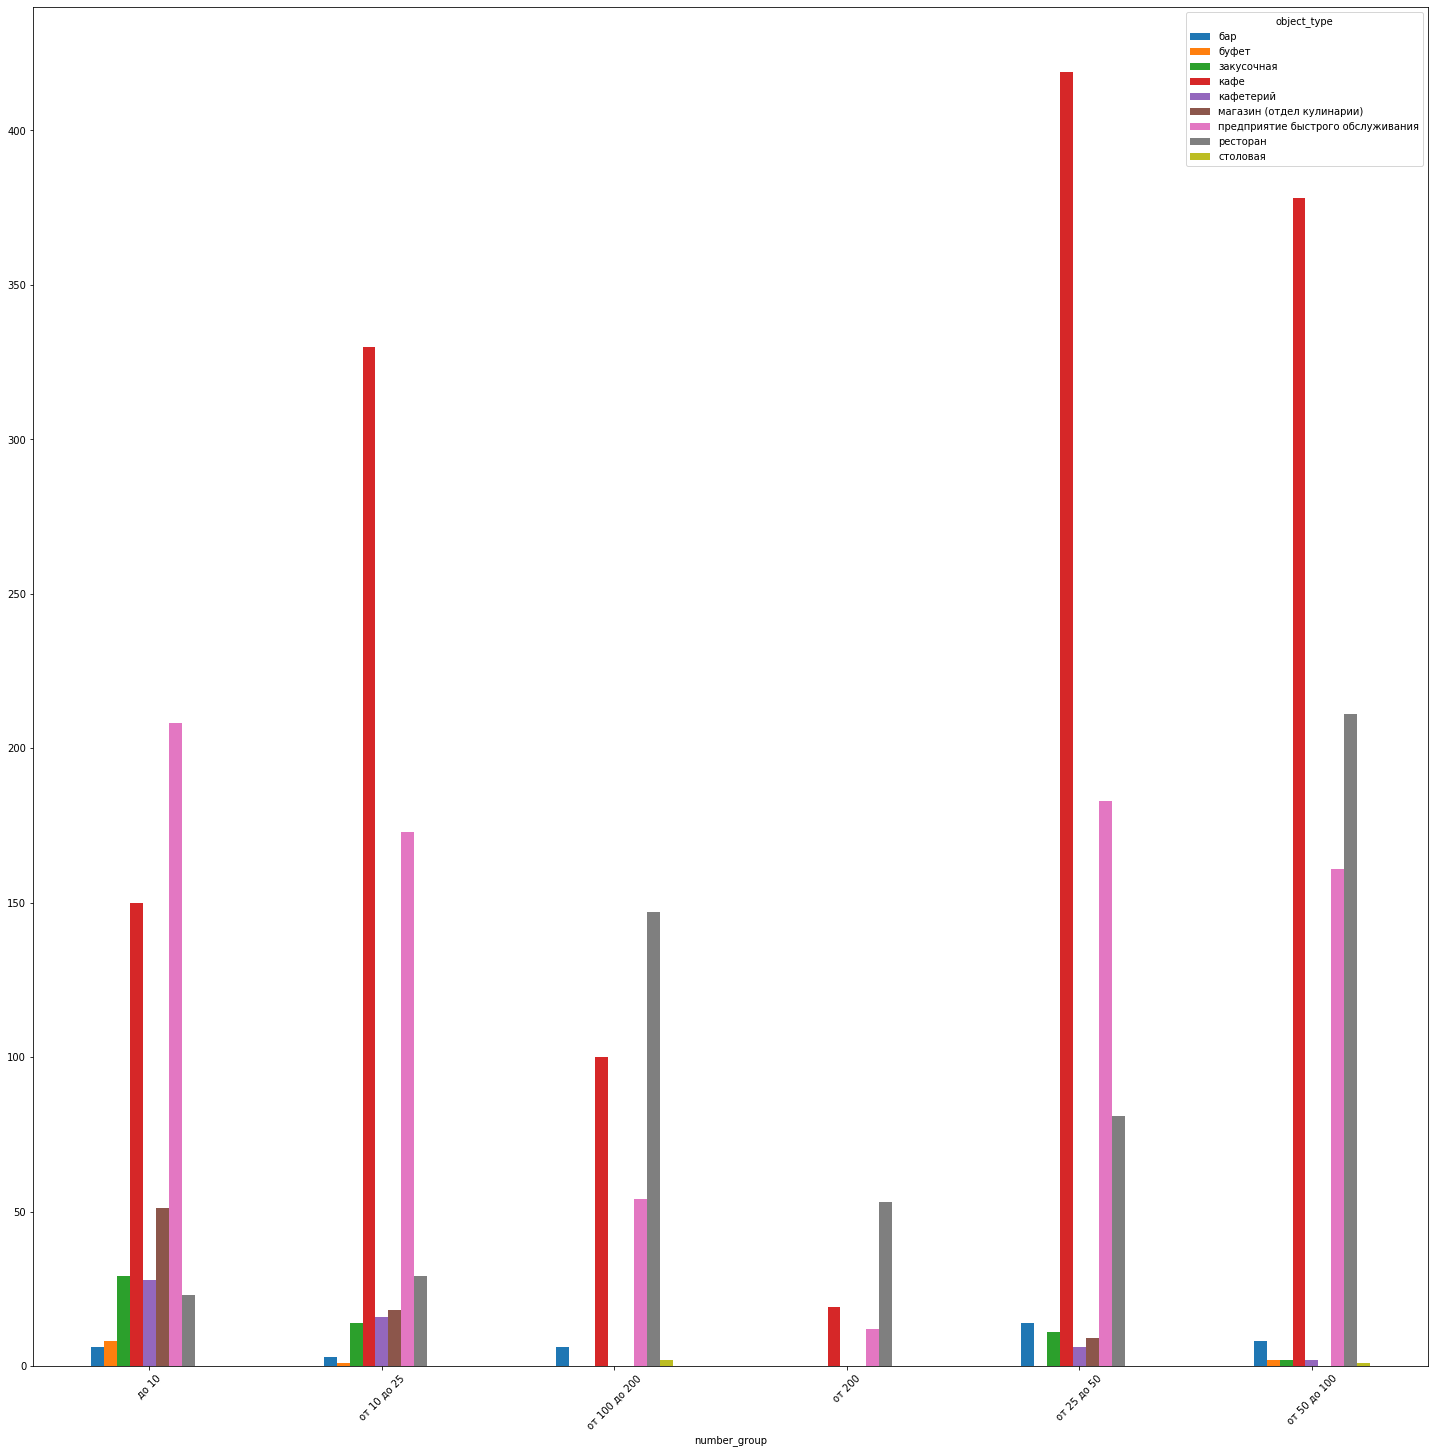

In [13]:
chain_pivot.plot(y = ['бар', 'буфет', 'закусочная', 'кафе', 'кафетерий', 'магазин (отдел кулинарии)', 'предприятие быстрого обслуживания', 'ресторан', 'столовая'], kind="bar", figsize = (25,25), rot = 45)



# Вывод:

    Анализ распределения количества посадочных мест выполняем с помощью тепловой карты. Анализ проводится среди наиболее распространенных типов заведений:
        1. Кафе - больше всего заведений с количеством мест от 25 до 100. Число заведений категории (10-25) также значительно.
        2. Предприятия быстрого обслуживания - ведущей категорией является (от 0 до 25) и (от 25 до 100). Сети KFC, бургер кинг и Макдональдс в подавляющем большинстве предлагают от 50 до 100 посадочных мест.
        3. Рестораны - предпочитают предлагать от 50 до 200 посадочных мест. В категории (до  25) рестораны не имеют заведений.
        
    Отметим, что в категории рестораны также попали сети KFC и Макдональдс, что может быть связано или с особенностями правовой формы владений, или особенностями сбора информации. Тем не менее, в этих категориях сохраняется то же распределение, что было описано в пункте 2.

## 2.5 Выделите в отдельный столбец информацию об улице из столбца address 

Учитывая, что мы планиируем открытие ресторана в Москве, а в датасете представлены адреса городов-спутников, то мы создаем отдельный массив с информацией  о ресторанах лишь в Москве.

In [14]:
rest_data.head(2)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35


In [15]:
moscow_rest = rest_data.copy()

moscow_rest = moscow_rest[(moscow_rest['address'].str.contains('Москва') & moscow_rest['address'].str.contains('Зеленоград') == False)]# & moscow_rest['address'].str.contains('поселение') == False)]
moscow_rest = moscow_rest[moscow_rest['address'].str.contains('поселение') == False]
moscow_rest['street'] = moscow_rest['address'].apply(lambda x: x.split(',')[1])
moscow_rest.head(5)


,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [16]:
moscow_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14712 entries, 0 to 15365
Data columns (total 7 columns):
id             14712 non-null int64
object_name    14712 non-null object
chain          14712 non-null object
object_type    14712 non-null object
address        14712 non-null object
number         14712 non-null int64
street         14712 non-null object
dtypes: int64(2), object(5)
memory usage: 919.5+ KB


## Вывод: 
    Задание выполнено - пропуски отсутствуют, в столбце street выведены названия улиц.

# 2.6 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [17]:
top_streets = moscow_rest.pivot_table(index = ['street'], values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False).reset_index()
    
top_uses_street = top_streets.head(10).copy()

top_uses_street



,street,id
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


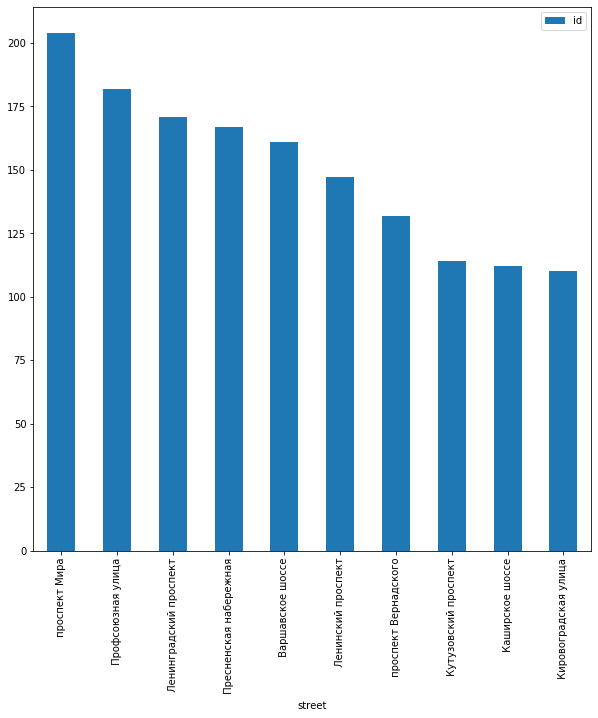

In [18]:
top_uses_street.head(10).plot(kind = 'bar', x = 'street', figsize = (10, 10))

Для получения района Москвы по адресу воспользуемся сервисом Yandex.Геокодер (https://tech.yandex.ru/maps/geocoder/). Указываем адрес для запроса и полученный ключ API. Соответствующие данные были получены из официальной документаци.

Создаем функцию getDistrict. Ее логиика:
    1. Передаем название улицы с указанием города;
    2. Получаем  json ответ, извлекаем кординаты;
    3. Отправляем повторный запрос с указанием кординат;
    4. Извлекаем название района.
    
Двойной запрос необходим по той причине, что сервис "отдает" название района лишь в случае передачи кординат.

In [20]:
import requests
import json

BASE_URL = "https://geocode-maps.yandex.ru/1.x?format=json"
API = '' #Для работы кода необходимо вставить индивидуальный ключ-API


def getDistrict(address):
    try:
        address = 'г. Москва, ' + address
        params = { # словарь с параметрами запроса
                "apikey" : API, # определяем API
                "geocode" : address # указываем адрес
            }

        response = requests.get(BASE_URL, params = params)
        response_text = response.text
        y = json.loads(response_text)


        position = y['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']

        params = { # словарь с параметрами запроса
                "apikey" : API, # определяем API
                "geocode" : position # указываем координаты
            }

        response = requests.get(BASE_URL, params = params)
        response_text = response.text
        y = json.loads(response_text)

        return y['response']['GeoObjectCollection']['featureMember'][2]['GeoObject']['metaDataProperty']['GeocoderMetaData']['Address']['Components'][4]['name']
    except:
        return 'Неизвестно'


In [21]:
top_uses_street['district'] = top_uses_street['street'].apply(getDistrict)

top_uses_street

,street,id,district
0,проспект Мира,204,Северо-Восточный административный округ
1,Профсоюзная улица,182,Юго-Западный административный округ
2,Ленинградский проспект,171,Северный административный округ
3,Пресненская набережная,167,Центральный административный округ
4,Варшавское шоссе,161,исторический район Чертаново
5,Ленинский проспект,147,Юго-Западный административный округ
6,проспект Вернадского,132,Юго-Западный административный округ
7,Кутузовский проспект,114,Западный административный округ
8,Каширское шоссе,112,Южный административный округ
9,Кировоградская улица,110,исторический район Чертаново


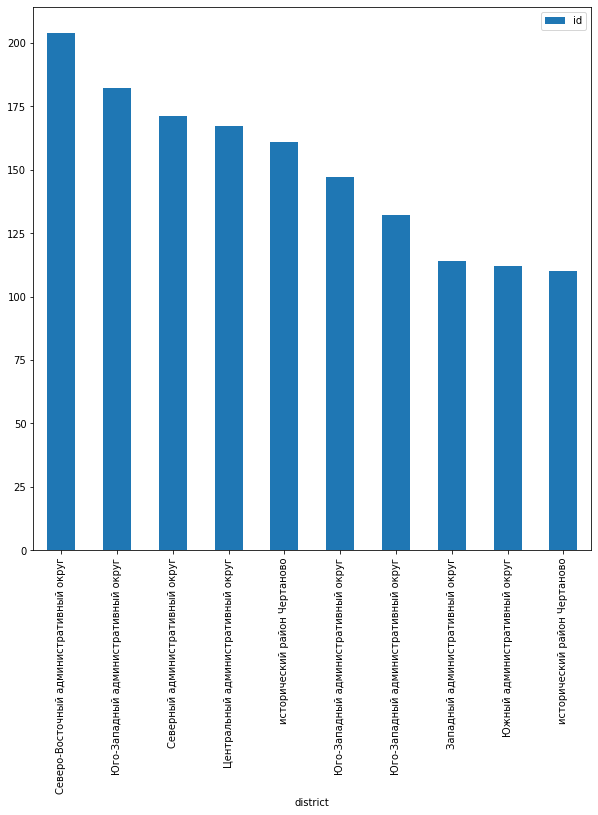

In [22]:
top_uses_street.plot(kind = 'bar', x = 'district', figsize = (10, 10))

# Вывод:

    На основании полученной информации  мы можем сделать вывод, что наибольшее число объектов на следующиих улицах:
        1.  Проспект Мира	        204	 Северо-Восточный административный округ
        1	Профсоюзная улица	    182	 Юго-Западный административный округ
        2	Ленинградский проспект	171	 Северный административный округ
        3	Пресненская набережная	167	 Центральный административный округ
        4	Варшавское шоссе	    161	 исторический район Чертаново
        5	Ленинский проспект	    147	 Юго-Западный административный округ
        6	проспект Вернадского	132	 Юго-Западный административный округ
        7	Кутузовский проспект	114	 Западный административный округ
        8	Каширское шоссе	        112	 Южный административный округ
        9	Кировоградская улица	110	 исторический район Чертаново

# 2.7 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [23]:
min_streets = moscow_rest.pivot_table(index = 'street', values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = True).reset_index()
min_streets = min_streets[min_streets['street'].str.contains('дом') == False]

min_streets = min_streets.query('id == 1')

min_streets.head(5)

,street,id
0,Пестовский переулок,1
2,Ижорский проезд,1
3,Изваринская улица,1
4,Известковый переулок,1
5,Измайловская площадь,1


In [24]:
min_streets['disctrict'] = min_streets['street'].apply(getDistrict)



In [25]:
min_streets.head(10)


,street,id,disctrict
0,Пестовский переулок,1,Центральный административный округ
2,Ижорский проезд,1,Северный административный округ
3,Изваринская улица,1,Неизвестно
4,Известковый переулок,1,Центральный административный округ
5,Измайловская площадь,1,Восточный административный округ
9,Иваньковское шоссе,1,Северо-Западный административный округ
10,Икшинская улица,1,Северный административный округ
13,Институтский переулок,1,Северо-Восточный административный округ
14,Интернациональная улица,1,Западный административный округ
18,Калибровская улица,1,Северо-Восточный административный округ


In [26]:
min_pivot = min_streets.pivot_table(index = 'disctrict', values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False).reset_index()

min_pivot  = min_pivot.query('disctrict != "Неизвестно" & id > 5')

min_pivot

,disctrict,id
0,Центральный административный округ,176
1,Северо-Восточный административный округ,65
2,Восточный административный округ,64
3,Северный административный округ,63
4,Юго-Восточный административный округ,54
5,Западный административный округ,40
6,Северо-Западный административный округ,27
7,Южный административный округ,23
8,Юго-Западный административный округ,20


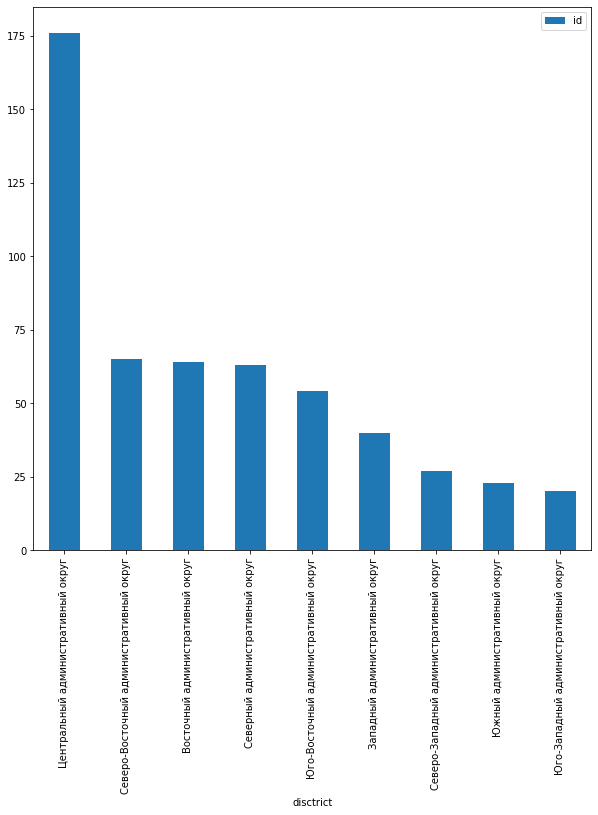

In [27]:
min_pivot.plot(kind = 'bar', x = 'disctrict', figsize = (10, 10))

# Вывод:

На основании полученной информации  мы можем сделать вывод, что наибольшее число объектов на следующиих улицах:

        1   Пестовский переулок	1	Центральный административный округ
        
        2	Ижорский проезд	1	Северный административный округ
        
        3	Изваринская улица	1	Неизвестно
        
        4	Известковый переулок	1	Центральный административный округ
        
        5	Измайловская площадь	1	Восточный административный округ
        
        6	Иваньковское шоссе	1	Северо-Западный административный округ
        
        7	Икшинская улица	1	Северный административный округ
        
        8	Институтский переулок	1	Северо-Восточный административный округ
        
        9	Интернациональная улица	1	Западный административный округ
        
        10	Калибровская улица	1	Северо-Восточный административный округ
        
Учитывая, что количество  улиц лишь с одним заведением в Москве насчитывается около 200, рекомендуется рассмотреть адреса в разрезе округов. Таким образом, количество улиц в каждом из округов:

        0	Центральный административный округ	176
        1	Северо-Восточный административный округ	65
        2	Восточный административный округ	64
        3	Северный административный округ	63
        4	Юго-Восточный административный округ	54
        5	Западный административный округ	40
        6	Северо-Западный административный округ	27
        7	Южный административный округ	23
        8	Юго-Западный административный округ	20



    

# 2.8 Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [28]:
moscow_rest['number_group'] = moscow_rest['number'].apply(amount_group)

moscow_rest.head(5)

,id,object_name,chain,object_type,address,number,street,number_group
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,от 25 до 50
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,от 25 до 50
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,от 50 до 100
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,от 25 до 50
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,от 50 до 100


In [29]:
pop_streets = moscow_rest.pivot_table(index = 'street', values = 'id', aggfunc = 'count').reset_index().sort_values(by = 'id', ascending = False).head(20)

mask = moscow_rest['street'].isin(pop_streets.query('id > 150')['street'])
rest_on_pop = moscow_rest[mask]

rest_on_pop.head(10)



,id,object_name,chain,object_type,address,number,street,number_group
151,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,от 100 до 200
152,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,от 25 до 50
153,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,от 25 до 50
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,до 10
155,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,до 10
156,26279,Ресторан «Макдоналдс»,да,кафе,"город Москва, Варшавское шоссе, дом 143А",70,Варшавское шоссе,от 50 до 100
541,135634,ФорТутти,нет,кафе,"город Москва, Ленинградский проспект, дом 2",23,Ленинградский проспект,от 10 до 25
542,25749,Папа Джонс,да,кафе,"город Москва, Ленинградский проспект, дом 10",56,Ленинградский проспект,от 50 до 100
543,27898,Столовая МОСГОРГЕОТРЕСТ,нет,столовая,"город Москва, Ленинградский проспект, дом 11",80,Ленинградский проспект,от 50 до 100
544,25526,Шоколадница,да,кафе,"город Москва, Ленинградский проспект, дом 12",65,Ленинградский проспект,от 50 до 100


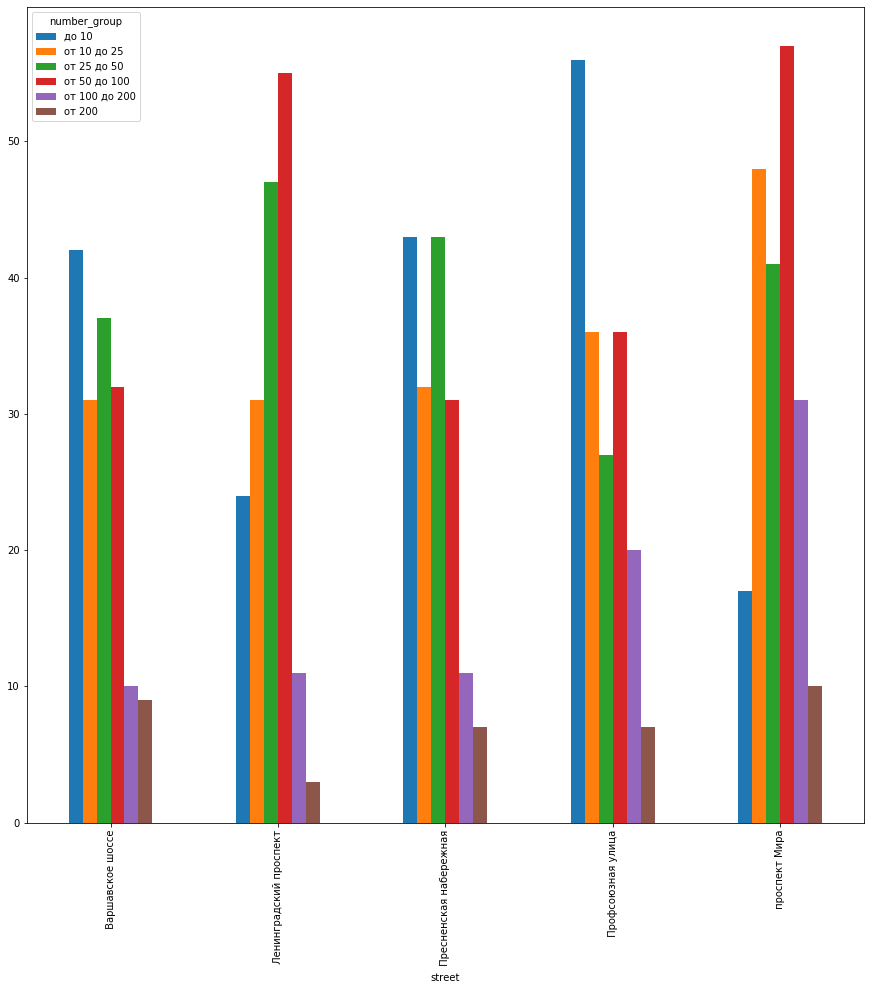

In [30]:
pop_street = rest_on_pop.pivot_table(index = ['street'], columns = 'number_group',  values = 'id', aggfunc = 'count').fillna(0)

pop_street.plot(kind = 'bar', y = ['до 10', 'от 10 до 25', 'от 25 до 50', 'от 50 до 100','от 100 до 200','от 200'], figsize = (15, 15))



# Вывод:
    
    На улицах с наибольшим количеством заведений была выявлена следующая закономерность:
    
        1. Число заведений с числом посадочных мест более 100 на порядки ниже, чем более миниатюрные заведения.
        2. На большинстве улиц остается достаточное число заведений с числом гостей менее  10.
        3. Наибольшее число заведений имеет от 25 до 100 посадочных мест.
        
        

# Общие выводы:

    На основании  проведенного исследования  можно сделать выводы:
            1. Наиболее распространены заведения с количеством посадочных мест от 25 до 100.
            2. В Центральном административном округе число заведений в два раза выше, чем в других. Тем не менее, остается большое количество улиц, где количество заведений  не  велико.
            3. Количество  сетевых  заведений в 3 раза меньше, чем не сетевых, что позволяет занять необходимую нишу в конкурентной среде.
            4. Число кафе в 2.5 раза выше, чем ресторанов, что может сказываться на качестве обслуживания. Рекомендуется рассматривать формат ресторана как более прибыльный для дальнейшей финансовой  деятельности.